# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [1]:
# Download the data
! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

--2019-06-07 10:29:25--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.112.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: <<pima-indians-diabetes.csv>>

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0.02s   

2019-06-07 10:29:25 (1.50 MB/s) - <<pima-indians-diabetes.csv>> saved [23628/23628]



In [2]:
# check if the data is downloaded
%ls -l

total 696
-rw-r--r--@ 1 oksanahrytsiv  staff     251 May  4 18:44 10 MongoDB-Todo.ipynb
-rw-r--r--  1 oksanahrytsiv  staff  123780 Jun  7 10:27 12_Pima_Indians_Diabetes.ipynb
-rw-r--r--  1 oksanahrytsiv  staff    8234 Apr  9 07:56 2 Finding values in collections Todo.ipynb
-rw-r--r--  1 oksanahrytsiv  staff   65819 Apr 23 07:25 3 Time Complexity.ipynb
-rw-r--r--  1 oksanahrytsiv  staff   14955 Apr 23 07:25 4 Decision Trees Todo.ipynb
-rw-r--r--  1 oksanahrytsiv  staff    8628 Apr 27 21:10 6 Linked-List-Todo DONE.ipynb
-rw-r--r--  1 oksanahrytsiv  staff    5545 Apr 27 21:10 7 Binary Search Tree-Todo.ipynb
-rw-rw-rw-@ 1 oksanahrytsiv  staff   42002 Apr 27 21:08 9 Web API.ipynb
-rw-r--r--  1 oksanahrytsiv  staff   30432 Jun  7 09:22 my_cool_model.h5
-rw-r--r--  1 oksanahrytsiv  staff   23628 Jun  7 10:29 pima-indians-diabetes.csv


In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

Using TensorFlow backend.


In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [6]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,:-1]
y = dataset[:,-1]

In [7]:
# print the shape of x
#
X.shape

(768, 8)

In [8]:
# save to number of input dimensions in input_dim
input_dim = X.shape[1]
input_dim

8

In [9]:
# shape of y
y.shape

(768,)

In [10]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)

In [11]:
# shape of X_test
# TODO
X_test.shape

(116, 8)

# Model

In [12]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# TODO
model = Sequential()
model.add(Dense(12, activation = 'relu', input_dim=input_dim))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Fit the model
model.fit(X_train, y_train, epochs = 300, batch_size = 10, validation_split = 0.15)
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = model.history

Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 1s 922us/step - loss: 4.5517 - acc: 0.6173 - val_loss: 2.7382 - val_acc: 0.6327
Epoch 2/300
554/554 [==============================] - 0s 238us/step - loss: 1.5336 - acc: 0.5668 - val_loss: 1.0885 - val_acc: 0.6224
Epoch 3/300
554/554 [==============================] - 0s 233us/step - loss: 0.8457 - acc: 0.6101 - val_loss: 0.8434 - val_acc: 0.6735
Epoch 4/300
554/554 [==============================] - 0s 210us/step - loss: 0.7546 - acc: 0.6318 - val_loss: 0.7363 - val_acc: 0.6939
Epoch 5/300
554/554 [==============================] - 0s 223us/step - loss: 0.7025 - acc: 0.6697 - val_loss: 0.7408 - val_acc: 0.6633
Epoch 6/300
554/554 [==============================] - 0s 204us/step - loss: 0.7136 - acc: 0.6588 - val_loss: 0.6882 - val_acc: 0.6837
Epoch 7/300
554/554 [==============================] - 0s 195us/step - loss: 0.6851 - acc: 0.6715

554/554 [==============================] - 0s 202us/step - loss: 0.5575 - acc: 0.7184 - val_loss: 0.5996 - val_acc: 0.7245
Epoch 60/300
554/554 [==============================] - 0s 186us/step - loss: 0.5421 - acc: 0.7274 - val_loss: 0.5763 - val_acc: 0.7143
Epoch 61/300
554/554 [==============================] - 0s 171us/step - loss: 0.5299 - acc: 0.7455 - val_loss: 0.5824 - val_acc: 0.7245
Epoch 62/300
554/554 [==============================] - 0s 173us/step - loss: 0.5337 - acc: 0.7473 - val_loss: 0.5847 - val_acc: 0.7449
Epoch 63/300
554/554 [==============================] - 0s 185us/step - loss: 0.5336 - acc: 0.7310 - val_loss: 0.5774 - val_acc: 0.7041
Epoch 64/300
554/554 [==============================] - 0s 190us/step - loss: 0.5327 - acc: 0.7310 - val_loss: 0.5727 - val_acc: 0.6939
Epoch 65/300
554/554 [==============================] - 0s 227us/step - loss: 0.5589 - acc: 0.7112 - val_loss: 0.5878 - val_acc: 0.7347
Epoch 66/300
554/554 [==============================] - 0s 17

554/554 [==============================] - 0s 169us/step - loss: 0.5241 - acc: 0.7329 - val_loss: 0.5406 - val_acc: 0.7347
Epoch 120/300
554/554 [==============================] - 0s 160us/step - loss: 0.5071 - acc: 0.7473 - val_loss: 0.5766 - val_acc: 0.7755
Epoch 121/300
554/554 [==============================] - 0s 169us/step - loss: 0.5340 - acc: 0.7256 - val_loss: 0.5371 - val_acc: 0.7551
Epoch 122/300
554/554 [==============================] - 0s 164us/step - loss: 0.5030 - acc: 0.7455 - val_loss: 0.5501 - val_acc: 0.7347
Epoch 123/300
554/554 [==============================] - 0s 177us/step - loss: 0.4955 - acc: 0.7690 - val_loss: 0.5321 - val_acc: 0.7551
Epoch 124/300
554/554 [==============================] - 0s 167us/step - loss: 0.4992 - acc: 0.7653 - val_loss: 0.5371 - val_acc: 0.7245
Epoch 125/300
554/554 [==============================] - 0s 225us/step - loss: 0.4996 - acc: 0.7671 - val_loss: 0.5530 - val_acc: 0.7245
Epoch 126/300
554/554 [==============================] 

Epoch 179/300
554/554 [==============================] - 0s 208us/step - loss: 0.4752 - acc: 0.7726 - val_loss: 0.5297 - val_acc: 0.7551
Epoch 180/300
554/554 [==============================] - 0s 173us/step - loss: 0.4778 - acc: 0.7635 - val_loss: 0.5265 - val_acc: 0.7245
Epoch 181/300
554/554 [==============================] - 0s 176us/step - loss: 0.4747 - acc: 0.7744 - val_loss: 0.5427 - val_acc: 0.7041
Epoch 182/300
554/554 [==============================] - 0s 171us/step - loss: 0.4862 - acc: 0.7563 - val_loss: 0.5355 - val_acc: 0.7041
Epoch 183/300
554/554 [==============================] - 0s 204us/step - loss: 0.4818 - acc: 0.7671 - val_loss: 0.5241 - val_acc: 0.7347
Epoch 184/300
554/554 [==============================] - 0s 245us/step - loss: 0.4900 - acc: 0.7581 - val_loss: 0.5343 - val_acc: 0.7347
Epoch 185/300
554/554 [==============================] - 0s 201us/step - loss: 0.4793 - acc: 0.7690 - val_loss: 0.5293 - val_acc: 0.7347
Epoch 186/300
554/554 [==================

Epoch 239/300
554/554 [==============================] - 0s 203us/step - loss: 0.4644 - acc: 0.7798 - val_loss: 0.5056 - val_acc: 0.7449
Epoch 240/300
554/554 [==============================] - 0s 222us/step - loss: 0.4697 - acc: 0.7762 - val_loss: 0.5092 - val_acc: 0.7449
Epoch 241/300
554/554 [==============================] - 0s 195us/step - loss: 0.4827 - acc: 0.7671 - val_loss: 0.5139 - val_acc: 0.7449
Epoch 242/300
554/554 [==============================] - 0s 229us/step - loss: 0.4606 - acc: 0.7726 - val_loss: 0.5320 - val_acc: 0.7143
Epoch 243/300
554/554 [==============================] - 0s 419us/step - loss: 0.4697 - acc: 0.7870 - val_loss: 0.5309 - val_acc: 0.7347
Epoch 244/300
554/554 [==============================] - 0s 230us/step - loss: 0.4663 - acc: 0.7780 - val_loss: 0.5264 - val_acc: 0.7449
Epoch 245/300
554/554 [==============================] - 0s 210us/step - loss: 0.4839 - acc: 0.7635 - val_loss: 0.5791 - val_acc: 0.7449
Epoch 246/300
554/554 [==================

Epoch 299/300
554/554 [==============================] - 0s 187us/step - loss: 0.4559 - acc: 0.7906 - val_loss: 0.5096 - val_acc: 0.7449
Epoch 300/300
554/554 [==============================] - 0s 180us/step - loss: 0.4596 - acc: 0.7870 - val_loss: 0.5010 - val_acc: 0.7449


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


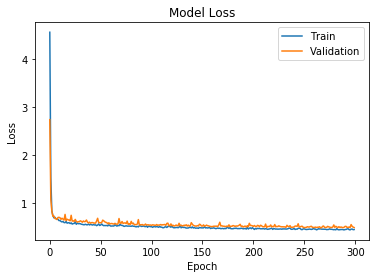

In [16]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

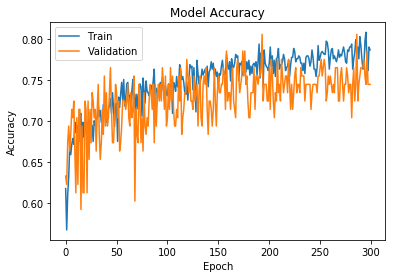

In [17]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_acc'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [18]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)

116/116 [==============================] - 0s 190us/step


In [19]:
print('Test loss score:', loss)
print('Test accuracy:', accuracy)

Test loss score: 0.5370843924325088
Test accuracy: 0.73275861657899
